<a href="https://colab.research.google.com/github/ZaazMarx1104/Churn-Rate-Prediction-Kaggle/blob/main/Customer_Churn_Prediction_Using_Random_Forest_and_XGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras

In [3]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df['customerID'].duplicated().sum()

0

In [7]:
df_for_corr = df.drop(columns=['customerID'])

In [8]:
df_for_corr['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df_for_corr['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [10]:
df_for_corr['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [11]:
df_for_corr['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [12]:
df_for_corr['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
df_for_corr['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
df_for_corr['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df_for_corr['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
df_for_corr['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [17]:
df_for_corr['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df_for_corr['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [19]:
df_for_corr['Churn'].unique()

array(['No', 'Yes'], dtype=object)

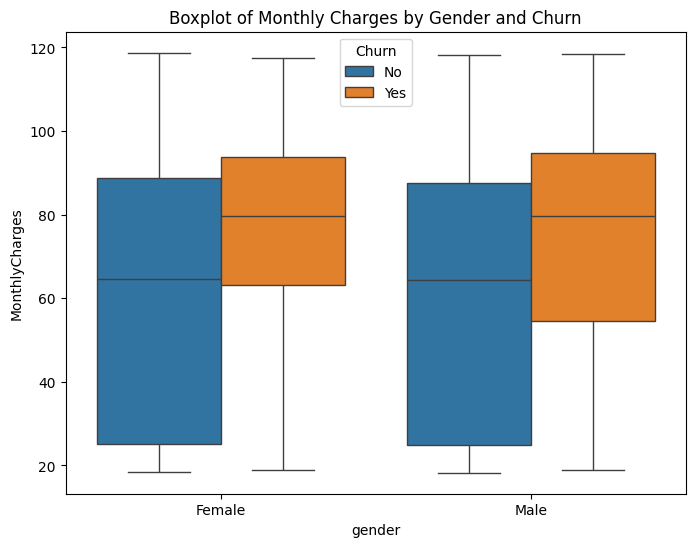

In [20]:
# prompt: draw a boxplot between gender and churn

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Boxplot of Monthly Charges by Gender and Churn')
plt.show()


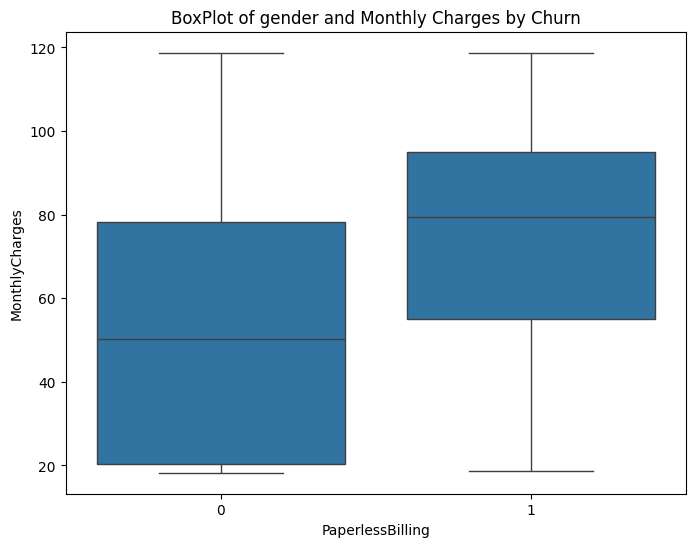

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PaperlessBilling', y='MonthlyCharges', data=df)
plt.title('BoxPlot of gender and Monthly Charges by Churn')
plt.show()

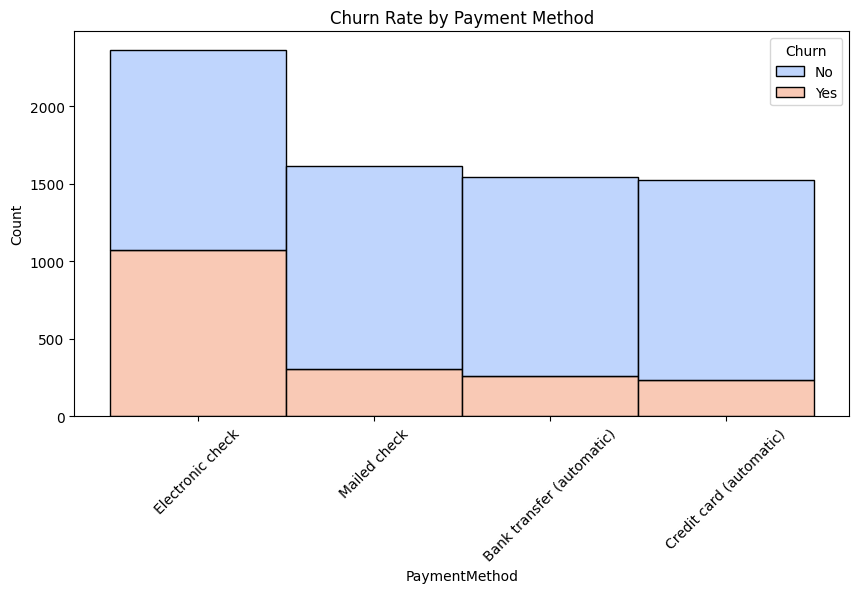

In [87]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_for_corr, x='PaymentMethod', hue='Churn', multiple='stack', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Churn Rate by Payment Method')
plt.show()


In [21]:
df_for_corr['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [22]:
print(100*1869/(1869+5174))

26.536987079369588


In [23]:
df_for_corr['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [24]:
df_for_corr['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


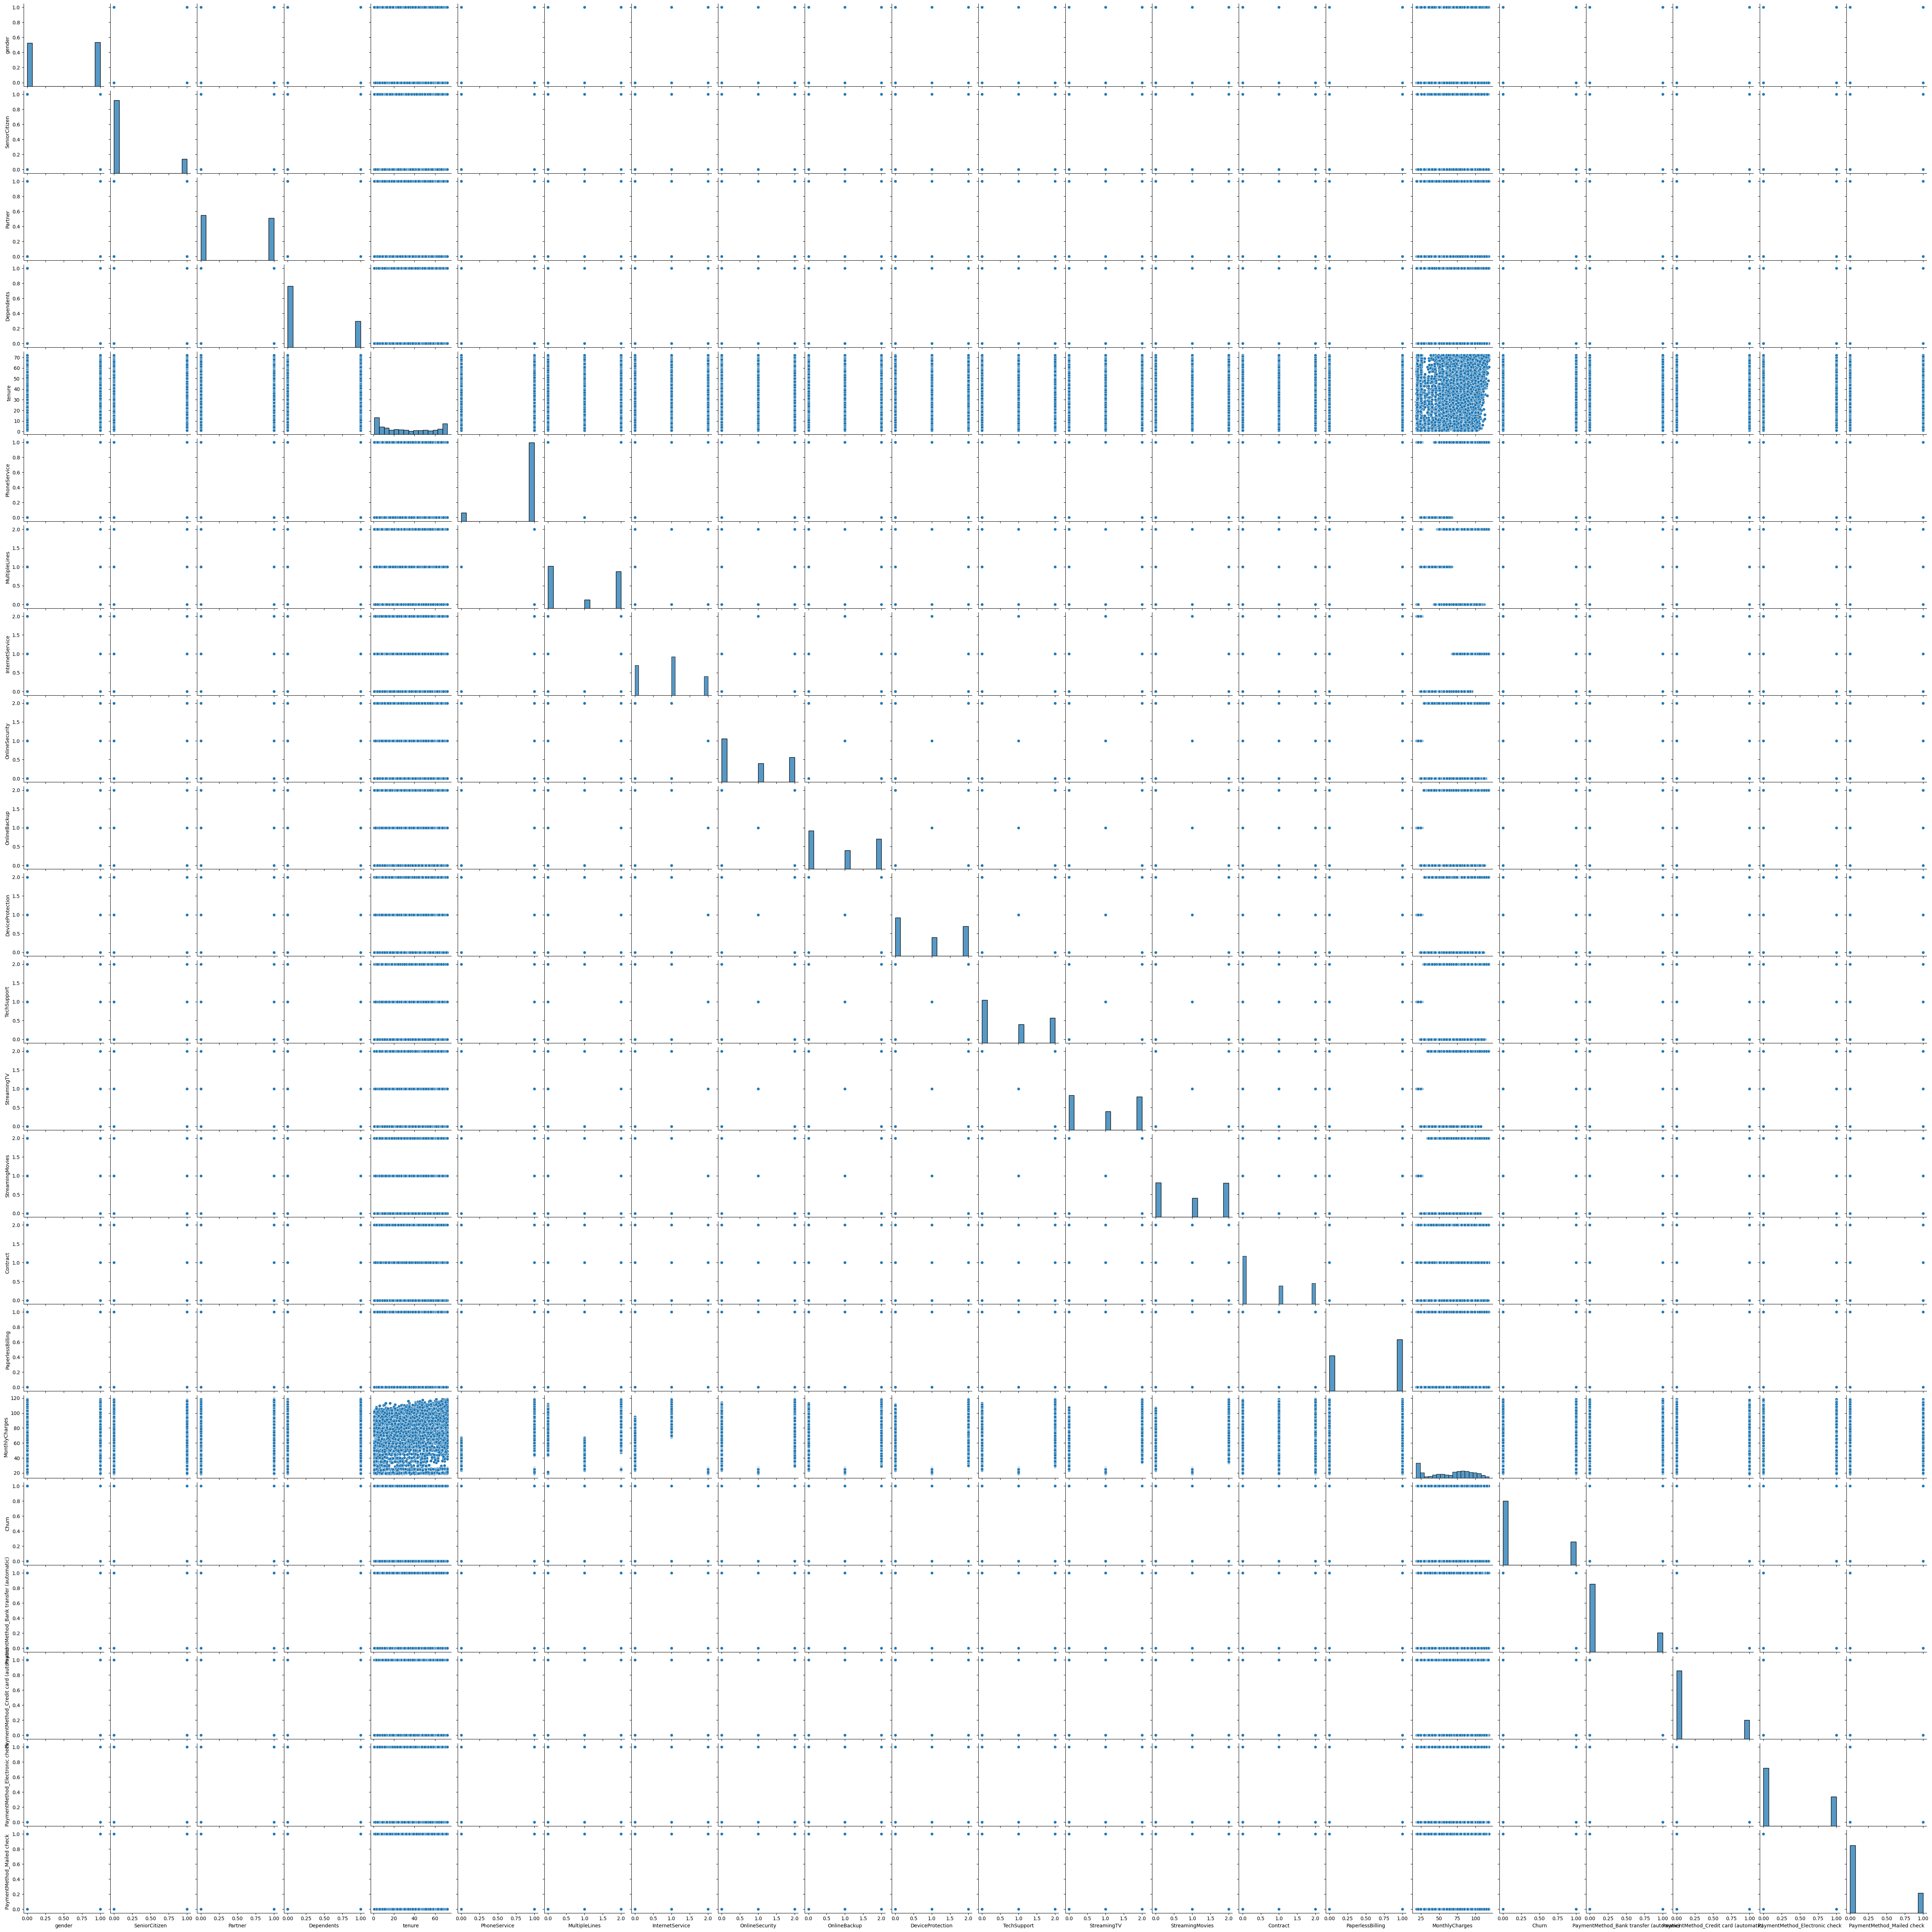

In [78]:
sns.pairplot(df)
plt.show()

In [25]:
df_with_churn = df_for_corr[df_for_corr['Churn'] == 'Yes']

In [26]:
df_without_churn = df_for_corr[df_for_corr['Churn'] == 'No']

In [27]:
df_with_churn['MonthlyCharges'].mean()

74.44133226324237

In [28]:
df_without_churn['MonthlyCharges'].mean()

61.26512369540008

We can quite clearly see that the people who churn out have a higher than average mean monthly charge

In [29]:
df_with_churn['MonthlyCharges'].describe()

,MonthlyCharges
count,1869.000000
mean,74.441332
std,24.666053
min,18.850000
25%,56.150000
50%,79.650000
75%,94.200000
max,118.350000


In [30]:
df_without_churn['MonthlyCharges'].describe()

,MonthlyCharges
count,5174.000000
mean,61.265124
std,31.092648
min,18.250000
25%,25.100000
50%,64.425000
75%,88.400000
max,118.750000


In [31]:
df_for_corr['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [32]:
df_with_churn['Contract'].value_counts()


,count
Contract,
Month-to-month,1655
One year,166
Two year,48


In [33]:
df_without_churn['Contract'].value_counts()

,count
Contract,
Month-to-month,2220
Two year,1647
One year,1307


# Encoding Categorical Variables

In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['Contract'] = ordinal_encoder.fit_transform(df[['Contract']])
df['Contract'] = df['Contract'].astype(int)

In [35]:
df['Contract'].value_counts()

,count
Contract,
0,3875
2,1695
1,1473


In [36]:
df['Churn'] = ordinal_encoder.fit_transform(df[['Churn']])
df['Churn'] = df['Churn'].astype(int)

In [37]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [38]:
df['Dependents']=ordinal_encoder.fit_transform(df[['Dependents']])
df['Dependents'] = df['Dependents'].astype(int)

In [39]:
df['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2110


In [40]:
df.shape

(7043, 21)

In [41]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
df_payment_method = onehot_encoder.fit_transform(df[['PaymentMethod']])
df_payment_method = pd.DataFrame(df_payment_method, columns=onehot_encoder.get_feature_names_out(['PaymentMethod']))

In [42]:
df_payment_method.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


In [43]:
df = pd.concat([df, df_payment_method], axis=1)
df.drop(columns=['PaymentMethod'], inplace=True)

In [44]:
df['InternetService']=ordinal_encoder.fit_transform(df[['InternetService']])
df['InternetService'] = df['InternetService'].astype(int)

In [45]:
df['InternetService'].value_counts()

,count
InternetService,
1,3096
0,2421
2,1526


In [46]:
df['Partner']=ordinal_encoder.fit_transform(df[['Partner']])
df['Partner'] = df['Partner'].astype(int)
df['Partner'].value_counts()

,count
Partner,
0,3641
1,3402


In [47]:
df['PhoneService']=ordinal_encoder.fit_transform(df[['PhoneService']])
df['PhoneService'] = df['PhoneService'].astype(int)
df['PhoneService'].value_counts()

,count
PhoneService,
1,6361
0,682


In [48]:
df['gender']=ordinal_encoder.fit_transform(df[['gender']])
df['gender'] = df['gender'].astype(int)
df['gender'].value_counts()

,count
gender,
1,3555
0,3488


In [49]:
df['MultipleLines']=ordinal_encoder.fit_transform(df[['MultipleLines']])
df['MultipleLines'] = df['MultipleLines'].astype(int)
df['MultipleLines'].value_counts()

,count
MultipleLines,
0,3390
2,2971
1,682


In [50]:
df['Dependents']=ordinal_encoder.fit_transform(df[['Dependents']])
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].value_counts()

,count
Dependents,
0,4933
1,2110


In [51]:
df['OnlineSecurity']=ordinal_encoder.fit_transform(df[['OnlineSecurity']])
df['OnlineSecurity'] = df['OnlineSecurity'].astype(int)
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
0,3498
2,2019
1,1526


In [52]:
df['StreamingTV']=ordinal_encoder.fit_transform(df[['StreamingTV']])
df['StreamingTV'] = df['StreamingTV'].astype(int)
df['StreamingTV'].value_counts()

,count
StreamingTV,
0,2810
2,2707
1,1526


In [53]:
df['StreamingMovies']=ordinal_encoder.fit_transform(df[['StreamingMovies']])
df['StreamingMovies'] = df['StreamingMovies'].astype(int)
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
0,2785
2,2732
1,1526


In [54]:
df['PaperlessBilling']=ordinal_encoder.fit_transform(df[['PaperlessBilling']])
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
1,4171
0,2872


In [55]:
df['OnlineBackup']=ordinal_encoder.fit_transform(df[['OnlineBackup']])
df['OnlineBackup'] = df['OnlineBackup'].astype(int)
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
0,3088
2,2429
1,1526


In [56]:
print(df.select_dtypes(include=['object']).columns)

Index(['customerID', 'DeviceProtection', 'TechSupport', 'TotalCharges'], dtype='object')


In [57]:
df['DeviceProtection']=ordinal_encoder.fit_transform(df[['DeviceProtection']])
df['DeviceProtection'] = df['DeviceProtection'].astype(int)
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
0,3095
2,2422
1,1526


In [58]:
df['TechSupport']=ordinal_encoder.fit_transform(df[['TechSupport']])
df['TechSupport'] = df['TechSupport'].astype(int)
df['TechSupport'].value_counts()

,count
TechSupport,
0,3473
2,2044
1,1526


In [59]:
df = df[~df.applymap(lambda x: isinstance(x, str) and ' ' in x).any(axis=1)]

<ipython-input-59-06d5cd4a305c>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df[~df.applymap(lambda x: isinstance(x, str) and ' ' in x).any(axis=1)]


# Random Forest

In [60]:
# prompt: import train test split

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Churn' is your target variable
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test


In [61]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_forest.fit(X_train,y_train)
Predictions = random_forest.predict(X_test)

In [63]:
Predictions = pd.DataFrame(Predictions)
Predictions.value_counts()

,count
0,
0,1139
1,268


In [64]:
y_test.value_counts()

,count
Churn,
0,1033
1,374


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, Predictions)
f1_score(y_test, Predictions)
print("Accuracy Score: ", accuracy_score(y_test, Predictions))
print("Precision Score: ", precision_score(y_test, Predictions))
print("Recall Score: ", recall_score(y_test, Predictions))
print("F1 Score: ", f1_score(y_test, Predictions))

Accuracy Score:  0.7896233120113717
Precision Score:  0.6455223880597015
Recall Score:  0.4625668449197861
F1 Score:  0.5389408099688473


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="precision",
    cv=5
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

In [67]:
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=20, n_estimators=500,
                       random_state=42)

In [68]:
best_rf_predictions = best_rf.predict(X_test)

In [69]:
best_rf_predictions = pd.DataFrame(best_rf_predictions)
best_rf_predictions.value_counts()

,count
0,
0,1141
1,266


In [70]:
best_rf.feature_importances_

array([0.01209214, 0.01708825, 0.01193561, 0.01284202, 0.15525541,
       0.00472346, 0.01697345, 0.04497888, 0.07440854, 0.02599606,
       0.01931952, 0.06696036, 0.01375843, 0.01479572, 0.14485032,
       0.01896016, 0.12845941, 0.14364172, 0.00743619, 0.00919153,
       0.04787722, 0.00845561])

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, best_rf_predictions)
f1_score(y_test, best_rf_predictions)
print("Accuracy Score: ", accuracy_score(y_test, best_rf_predictions))
print("Precision Score: ", precision_score(y_test, best_rf_predictions))
print("Recall Score: ", recall_score(y_test, best_rf_predictions))
print("F1 Score: ", f1_score(y_test, best_rf_predictions))

Accuracy Score:  0.7967306325515281
Precision Score:  0.6654135338345865
Recall Score:  0.4732620320855615
F1 Score:  0.553125


<ipython-input-89-441844b50337>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


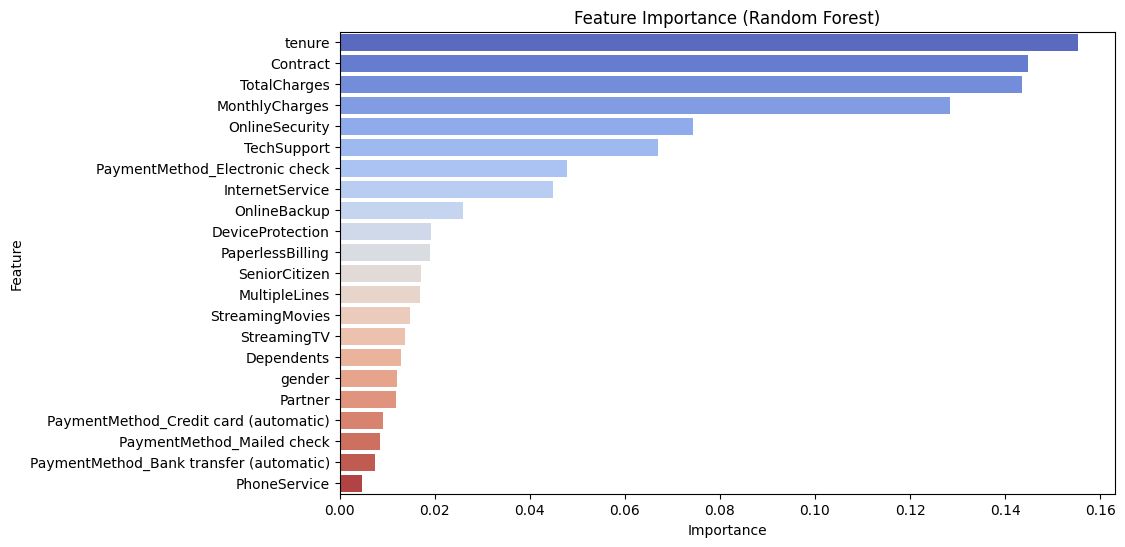

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance (Random Forest)')
plt.show()


# XGB

In [73]:
# Convert 'TotalCharges' column to numeric, handling errors
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
# Replace NaN values with 0 if needed
X_train['TotalCharges'].fillna(0, inplace=True)

# Convert 'TotalCharges' column to numeric, handling errors
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')
# Replace NaN values with 0 if needed
X_test['TotalCharges'].fillna(0, inplace=True)


# Now you can proceed with fitting the model:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train) # This should now work without the ValueError
xgb_predictions = xgb_model.predict(X_test)

<ipython-input-73-f69e88c3b0d1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['TotalCharges'].fillna(0, inplace=True)
<ipython-input-73-f69e88c3b0d1>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [74]:
xgb_predictions = pd.DataFrame(xgb_predictions)
xgb_predictions.value_counts()

,count
0,
0,1101
1,306


In [75]:
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

In [76]:
print("Accuracy Score: ", xgb_accuracy)
print("Precision Score: ", xgb_precision)
print("Recall Score: ", xgb_recall)
print("F1 Score: ", xgb_f1)

Accuracy Score:  0.7924662402274343
Precision Score:  0.6339869281045751
Recall Score:  0.5187165775401069
F1 Score:  0.5705882352941176


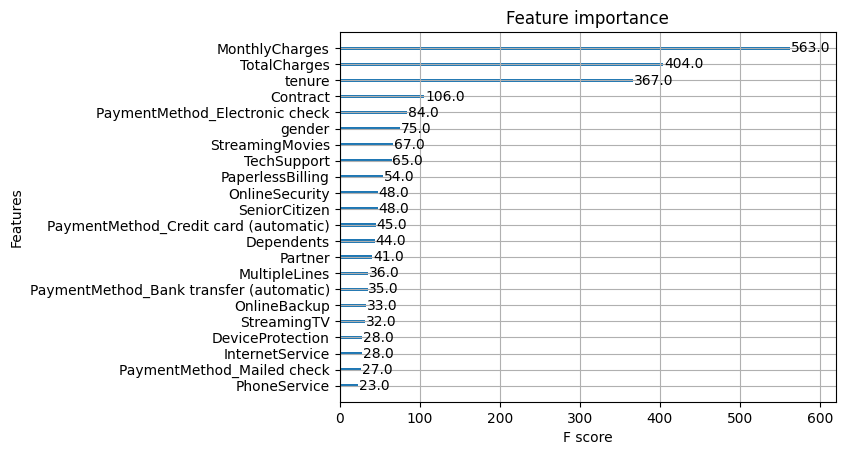

In [90]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()
